In [1]:
import sklearn

In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import cross_validation
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn import model_selection

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphics and figure styling

In [3]:
import pandas as pd

In [4]:
from sklearn import preprocessing

In [5]:
beer=pd.read_csv('recipeData.csv', index_col='BeerID', encoding='latin1')

In [6]:
beer.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [7]:
beer=beer.drop(['URL','Name','BoilGravity','MashThickness','PitchRate','PrimaryTemp','PrimingMethod','PrimingAmount'], axis=1)

In [8]:
beer.head()

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,BrewMethod
BeerID,,,,,,,,,,,,,
1,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0,Specific Gravity,All Grain
2,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,70.0,Specific Gravity,All Grain
3,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,70.0,Specific Gravity,extract
4,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,70.0,Specific Gravity,All Grain
5,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,72.0,Specific Gravity,All Grain


In [9]:
beer=beer.drop(['Style'], axis=1)

In [10]:
beer.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,BrewMethod
BeerID,,,,,,,,,,,,
1,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0,Specific Gravity,All Grain
2,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,70.0,Specific Gravity,All Grain
3,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,70.0,Specific Gravity,extract
4,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,70.0,Specific Gravity,All Grain
5,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,72.0,Specific Gravity,All Grain


In [11]:
beer.SugarScale.describe()

count                73861
unique                   2
top       Specific Gravity
freq                 71959
Name: SugarScale, dtype: object

In [12]:
beer.SugarScale.categories

AttributeError: 'Series' object has no attribute 'categories'

In [13]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Data columns (total 12 columns):
StyleID       73861 non-null int64
Size(L)       73861 non-null float64
OG            73861 non-null float64
FG            73861 non-null float64
ABV           73861 non-null float64
IBU           73861 non-null float64
Color         73861 non-null float64
BoilSize      73861 non-null float64
BoilTime      73861 non-null int64
Efficiency    73861 non-null float64
SugarScale    73861 non-null object
BrewMethod    73861 non-null object
dtypes: float64(8), int64(2), object(2)
memory usage: 9.8+ MB


In [14]:
beer.SugarScale = beer.SugarScale.astype('category')

In [15]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Data columns (total 12 columns):
StyleID       73861 non-null int64
Size(L)       73861 non-null float64
OG            73861 non-null float64
FG            73861 non-null float64
ABV           73861 non-null float64
IBU           73861 non-null float64
Color         73861 non-null float64
BoilSize      73861 non-null float64
BoilTime      73861 non-null int64
Efficiency    73861 non-null float64
SugarScale    73861 non-null category
BrewMethod    73861 non-null object
dtypes: category(1), float64(8), int64(2), object(1)
memory usage: 9.3+ MB


In [16]:
beer.BrewMethod = beer.BrewMethod.astype('category')

In [17]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Data columns (total 12 columns):
StyleID       73861 non-null int64
Size(L)       73861 non-null float64
OG            73861 non-null float64
FG            73861 non-null float64
ABV           73861 non-null float64
IBU           73861 non-null float64
Color         73861 non-null float64
BoilSize      73861 non-null float64
BoilTime      73861 non-null int64
Efficiency    73861 non-null float64
SugarScale    73861 non-null category
BrewMethod    73861 non-null category
dtypes: category(2), float64(8), int64(2)
memory usage: 8.8 MB


In [18]:
beer.BrewMethod

BeerID
1           All Grain
2           All Grain
3             extract
4           All Grain
5           All Grain
6           All Grain
7           All Grain
8           All Grain
9           All Grain
10          All Grain
11          All Grain
12               BIAB
13          All Grain
14            extract
15          All Grain
16          All Grain
17               BIAB
18          All Grain
19          All Grain
20          All Grain
21          All Grain
22          All Grain
23          All Grain
24          All Grain
25               BIAB
26          All Grain
27               BIAB
28          All Grain
29          All Grain
30          All Grain
             ...     
73832       All Grain
73833       All Grain
73834            BIAB
73835       All Grain
73836       All Grain
73837            BIAB
73838       All Grain
73839       All Grain
73840       All Grain
73841       All Grain
73842       All Grain
73843            BIAB
73844            BIAB
73845       All Grain
738

In [19]:
beer.SugarScale

BeerID
1        Specific Gravity
2        Specific Gravity
3        Specific Gravity
4        Specific Gravity
5        Specific Gravity
6        Specific Gravity
7        Specific Gravity
8        Specific Gravity
9        Specific Gravity
10       Specific Gravity
11       Specific Gravity
12       Specific Gravity
13       Specific Gravity
14       Specific Gravity
15       Specific Gravity
16       Specific Gravity
17       Specific Gravity
18       Specific Gravity
19       Specific Gravity
20       Specific Gravity
21       Specific Gravity
22       Specific Gravity
23       Specific Gravity
24       Specific Gravity
25       Specific Gravity
26       Specific Gravity
27       Specific Gravity
28       Specific Gravity
29       Specific Gravity
30       Specific Gravity
               ...       
73832    Specific Gravity
73833    Specific Gravity
73834    Specific Gravity
73835    Specific Gravity
73836    Specific Gravity
73837    Specific Gravity
73838    Specific Gravity
73839

In [20]:
from pandas.api.types import CategoricalDtype

In [21]:
beer.BrewMethod

BeerID
1           All Grain
2           All Grain
3             extract
4           All Grain
5           All Grain
6           All Grain
7           All Grain
8           All Grain
9           All Grain
10          All Grain
11          All Grain
12               BIAB
13          All Grain
14            extract
15          All Grain
16          All Grain
17               BIAB
18          All Grain
19          All Grain
20          All Grain
21          All Grain
22          All Grain
23          All Grain
24          All Grain
25               BIAB
26          All Grain
27               BIAB
28          All Grain
29          All Grain
30          All Grain
             ...     
73832       All Grain
73833       All Grain
73834            BIAB
73835       All Grain
73836       All Grain
73837            BIAB
73838       All Grain
73839       All Grain
73840       All Grain
73841       All Grain
73842       All Grain
73843            BIAB
73844            BIAB
73845       All Grain
738

In [22]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Data columns (total 12 columns):
StyleID       73861 non-null int64
Size(L)       73861 non-null float64
OG            73861 non-null float64
FG            73861 non-null float64
ABV           73861 non-null float64
IBU           73861 non-null float64
Color         73861 non-null float64
BoilSize      73861 non-null float64
BoilTime      73861 non-null int64
Efficiency    73861 non-null float64
SugarScale    73861 non-null category
BrewMethod    73861 non-null category
dtypes: category(2), float64(8), int64(2)
memory usage: 8.8 MB


In [23]:
beer.BrewMethod.cat.categories

Index(['All Grain', 'BIAB', 'Partial Mash', 'extract'], dtype='object')

In [24]:
beer.BrewMethod = beer.BrewMethod.cat.rename_categories([0,1,2,3])

In [25]:
print(np.bincount(beer.StyleID).argmax())

7


In [26]:
from collections import Counter
words=beer.StyleID
most_common_numbers= [word for word, word_count in Counter(words).most_common(5)]
most_common_numbers_2= [word for word, word_count in Counter(words).most_common(5)]
print(most_common_numbers)

[7, 10, 134, 9, 4]


In [27]:
words=beer.StyleID
word_count_total = 0
most_common_numbers= [word_count for word, word_count in Counter(words).most_common(5)]
word_count_total=np.array(most_common_numbers)
print(most_common_numbers)
print(word_count_total.sum())


[11940, 7581, 2617, 2277, 2038]
26453


In [28]:
beer4 = beer.set_index("StyleID")

In [29]:
print((beer.loc[beer['StyleID'].isin([7, 10, 134, 9, 4])]).head(50))
beer5 = beer.loc[beer['StyleID'].isin([7, 10, 134, 9, 4])]

        StyleID  Size(L)       OG      FG   ABV     IBU  Color  BoilSize  \
BeerID                                                                     
3             7    18.93   1.0630  1.0180  5.91   59.25   8.98     22.71   
4             7    22.71   1.0610  1.0170  5.80   54.48   8.50     26.50   
6            10    24.61   1.0550  1.0130  5.58   40.12   8.00     29.34   
11            7    25.00   1.0640  1.0140  6.63   64.26   7.78     29.00   
12            7    15.14   1.0660  1.0150  6.62  111.00  14.26     11.36   
13            7    20.82   1.0730  1.0190  7.07   69.72   6.28     28.39   
14            7    18.93   1.0660  1.0170  6.51   60.96  10.54     11.36   
15            7    37.85   1.0640  1.0170  6.20   64.67   3.91     34.07   
17          134    20.82   1.0730  1.0150  7.63   44.94   6.25     28.39   
18            7    20.82   1.0730  1.0180  7.14   61.83   8.10     24.61   
20            7    21.77   1.0620  1.0130  6.50   53.30   5.20     28.39   
23          

In [30]:
beerStyleColumn = beer.StyleID

In [31]:
beerStyleColumn

BeerID
1         45
2         85
3          7
4          7
5         20
6         10
7         86
8         45
9        129
10        86
11         7
12         7
13         7
14         7
15         7
16        31
17       134
18         7
19       113
20         7
21        65
22        86
23       134
24        65
25         7
26        10
27         7
28       163
29         7
30       129
        ... 
73832      7
73833    134
73834     45
73835     35
73836      7
73837     23
73838      7
73839     94
73840      7
73841     92
73842      7
73843      9
73844    102
73845      9
73846      7
73847      9
73848    134
73849      9
73850      7
73851     10
73852     67
73853     10
73854      7
73855     10
73856      7
73857     36
73858    151
73859    111
73860     92
73861      7
Name: StyleID, Length: 73861, dtype: int64

In [32]:
beer = beer.drop('StyleID', axis=1)

In [33]:
beer5StyleColumn = beer5.StyleID

In [34]:
beer5 = beer5.drop('StyleID', axis=1)

In [35]:
beer5.SugarScale = beer5.SugarScale.cat.rename_categories([0,1])

In [36]:
beer5Small = beer5

In [37]:
beer5StyleColumnSmall = beer5StyleColumn

In [39]:
beerInfo_train, beerInfo_test, beerStyle_train, beerStyle_test = cross_validation.train_test_split(beer5Small, beer5StyleColumnSmall, test_size=0.3, random_state=0)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
beerIDM2 = RandomForestClassifier(max_depth=5, random_state=0)
from sklearn.feature_selection import RFE
rfe3 = RFE(beerIDM2, n_features_to_select=6)
rfe3.fit(beerInfo_train, beerStyle_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
  n_features_to_select=6, step=1, verbose=0)

In [131]:
from sklearn.linear_model import LinearRegression
beerIDM = linear_model.LogisticRegression()
rfe2 = RFE(beerIDM, n_features_to_select=4)
rfe2.fit(beerInfo_train, beerStyle_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=4, step=1, verbose=0)

In [ ]:
from sklearn.svm import SVR
clf = SVR(kernel="linear")
rfe4 = RFE(clf, n_features_to_select=5)
rfe4.fit(beerInfo_train, beerStyle_train)

In [141]:
rfe2.ranking_

array([7, 1, 1, 1, 4, 2, 8, 5, 6, 1, 3])

In [136]:
predictOutput=rfe2.predict(beerInfo_test)

In [137]:
(predictOutput==beerStyle_test).sum()

4152

In [138]:
(predictOutput!=beerStyle_test).sum()

3784

In [43]:
beerStyle_train

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,BrewMethod
BeerID,,,,,,,,,,,
5366,20.82,1.040,1.011,3.83,23.50,3.21,26.50,60,35.0,1,3
4342,9.46,1.063,1.018,5.93,100.15,16.50,12.30,60,75.0,1,0
7482,18.93,1.083,1.021,8.11,0.00,13.74,22.71,60,75.0,1,0
2732,9.46,1.065,1.018,6.10,32.44,38.69,15.14,60,70.0,1,0
1512,18.93,1.069,1.016,7.00,0.00,22.90,25.70,60,72.0,1,0
2015,20.82,1.049,1.014,4.59,14.62,3.89,11.36,60,70.0,1,2
6010,50.00,1.049,1.010,5.17,39.75,5.79,53.00,60,70.0,1,0
7268,18.93,1.066,1.018,6.23,49.93,11.95,11.36,60,35.0,1,3
2435,21.00,1.065,1.013,6.85,34.75,10.39,28.50,60,75.0,1,0


In [127]:
beerIDM.fit(beerStyle_train, beerInfo_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
beerTestPredict=beerIDM.predict(beerStyle_test)

In [130]:
print(beerTestPredict==beerInfo_test)

BeerID
1564    False
5334    False
7425     True
6732    False
4179    False
6805    False
3019    False
6318    False
3324    False
1934    False
4271    False
2091    False
4943    False
4272    False
4377    False
2824     True
4845    False
7410    False
348     False
3945    False
305     False
3061    False
3848    False
2079    False
4579    False
979     False
3999    False
4203    False
3482    False
1067     True
        ...  
6299     True
993      True
2777     True
4748    False
6990    False
5524     True
60      False
3927     True
4446    False
343     False
70      False
6426    False
6949    False
781     False
625     False
266     False
1773     True
5783     True
5389    False
1342     True
3100     True
2591    False
4267    False
717     False
2454    False
4500     True
2001    False
1037    False
1164     True
1849    False
Name: StyleID, Length: 2250, dtype: bool


In [129]:
beerInfo_test.BeerID

AttributeError: 'Series' object has no attribute 'BeerID'

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

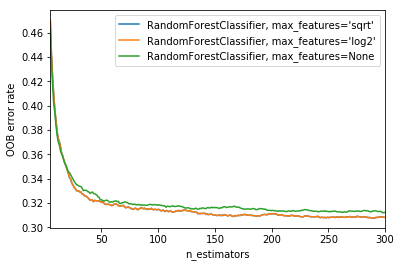

In [41]:
#Running The Beer OOB Error Test
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(beerInfo_train, beerStyle_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

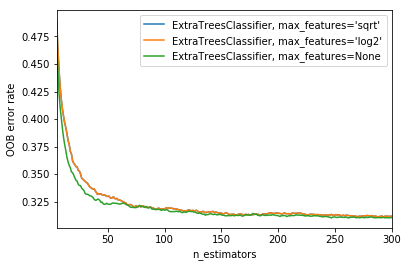

In [43]:
#Running The Extra Trees OOB Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("ExtraTreesClassifier, max_features='sqrt'",
        ExtraTreesClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features='log2'",
        ExtraTreesClassifier(warm_start=True, max_features='log2',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=None", 
        ExtraTreesClassifier(warm_start=True, max_features=None,
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(beerInfo_train, beerStyle_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

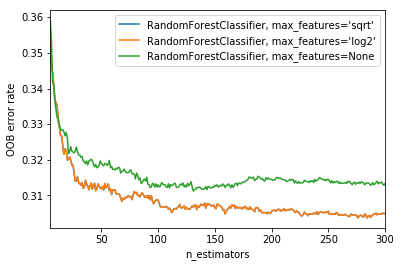

In [45]:
#Running The Random Forest Test Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(beerInfo_train, beerStyle_train)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(beerInfo_test)
        test_errorCLF = (1 - sum(y_pred == beerStyle_test)/len(y_pred))
        error_rate[label].append((i, test_errorCLF))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

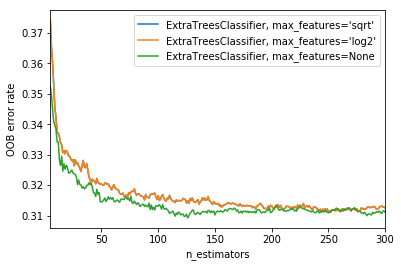

In [46]:
#Running The Extra Trees Test Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("ExtraTreesClassifier, max_features='sqrt'",
        ExtraTreesClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features='log2'",
        ExtraTreesClassifier(warm_start=True, max_features='log2',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=None",
        ExtraTreesClassifier(warm_start=True, max_features=None,
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(beerInfo_train, beerStyle_train)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(beerInfo_test)
        test_errorCLF = (1 - sum(y_pred == beerStyle_test)/len(y_pred))
        error_rate[label].append((i, test_errorCLF))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

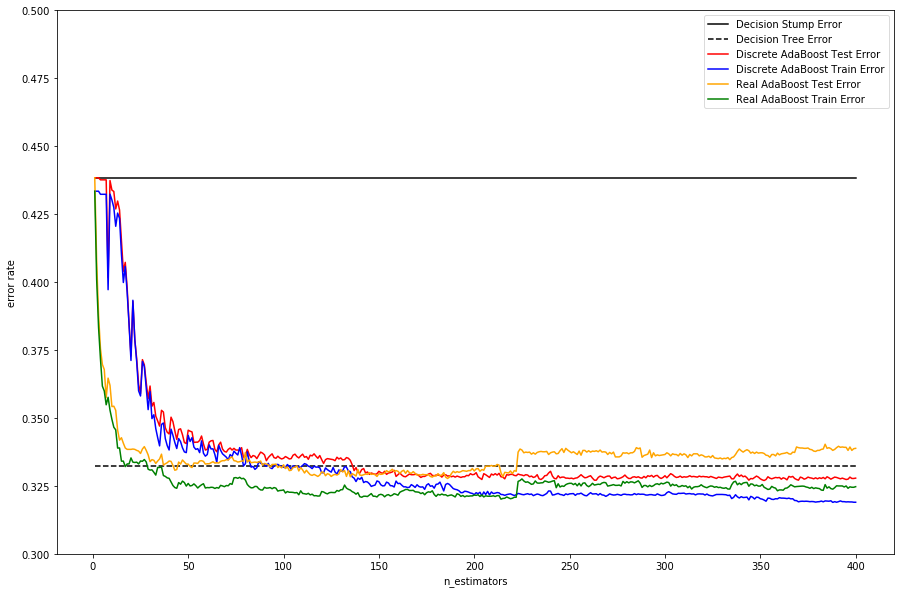

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
n_estimators = 400
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(beerInfo_train, beerStyle_train)
dt_err = 1.0 - dt.score(beerInfo_test, beerStyle_test)
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(beerInfo_train, beerStyle_train)
dt_stump_err = 1.0 - dt_stump.score(beerInfo_test, beerStyle_test)
ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(beerInfo_train, beerStyle_train)
ada_real.fit(beerInfo_train, beerStyle_train)
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(beerInfo_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, beerStyle_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(beerInfo_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, beerStyle_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(beerInfo_test)):
    ada_real_err[i] = zero_one_loss(y_pred, beerStyle_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(beerInfo_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, beerStyle_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.3, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()
fig.savefig("adaboostBeer.pdf", bbox_inches='tight')